# Jan Suchánek
## 1)  a) Generate an AR(1) and ARMA(1,1) process. Do not use predefined functions. Estimate both the processes

In [9]:
if (!require(forecast)) install.packages("forecast")
if (!require(uroot)) install.packages("uroot")
library(stats)
library(repr) 
library(tseries)
library(readr)
library(forecast)
library(uroot)
library(dplyr)

options(repr.plot.width = 10, repr.plot.height = 4)

Loading required package: forecast
Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Loading required package: uroot
Warning message:
"package 'uroot' was built under R version 3.6.3"Warning message:
"package 'tseries' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



### AR(1) process


Call:
arima(x = y, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.7458     0.0981
s.e.  0.0298     0.1748

sigma^2 estimated as 0.9992:  log likelihood = -709.69,  aic = 1425.37

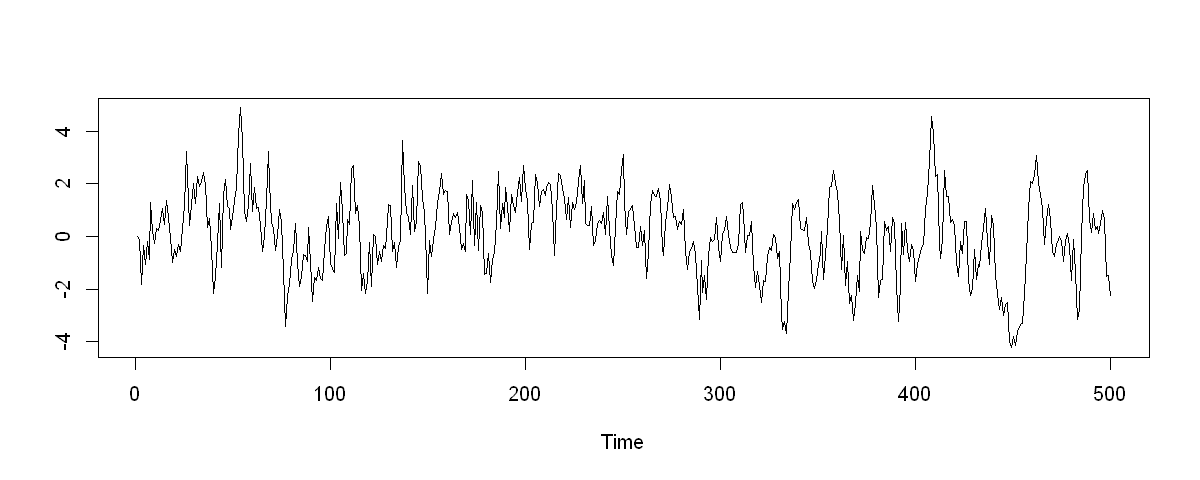

In [10]:
set.seed(69420)                                                        # first set seed for replicability
n <- 500                                                               # number of observations
e <- rnorm(n)                                                          # error terms
y <- vector()                                                          # blank vector to store values of explained variable
phi_1 <- 0.75                                                          # set value of parameter

y[1] <- 0                                                              # set value of explained variable in first period

for (i in 2:n){
    y[i] <- phi_1 * y[i-1] + e[i]                                      # create the rest of eplained variable
}

plot.ts(y, ylab = NA)                                                  # graphical visualization

ARmodel = arima(y, order = c(1,0,0))                                   # estimate the process
ARmodel  

From the estimation, it can be seen that value of intercept is statistically insignificant. That is good, as no intercept was involved in the creation of explained variable. However, value of the parameter is estimated quite precisely and highly statistically significant.

### ARMA(1,1) process


Call:
arima(x = y, order = c(1, 0, 1))

Coefficients:
         ar1     ma1  intercept
      0.7489  0.8944     0.1787
s.e.  0.0302  0.0228     0.3337

sigma^2 estimated as 0.9914:  log likelihood = -709.05,  aic = 1426.09

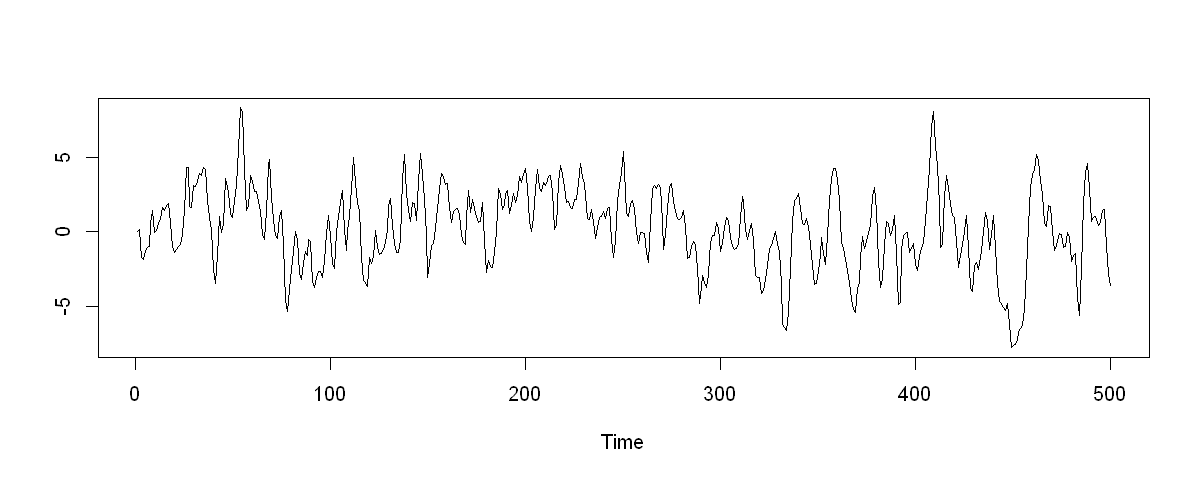

In [7]:
set.seed(69420)
n <- 500 # number of observations
e <- rnorm(n) # 
y <- vector() # empty vector for the explained variable
phi_1 <- 0.75 # set value of AR parameter
theta_1 <- 0.9 # set value of MA parameter

y[1] <- 0

for (i in 2:n){
    y[i] <- phi_1 * y[i - 1] + theta_1 * e[i - 1] + e[i]
}


options(repr.plot.width = 10, repr.plot.height = 4)
plot.ts(y, ylab = NA)

ARmodel = arima(y, order = c(1,0,1))                                   # estimate the process
ARmodel  

Again, estimation is quite precise. Estimated values of coefficients are statistically significant and close to their real value and estimated value of intercept is statistically insignificant.

## 1) b) Choose one real time series and estimate the best linear model (AR, MA, ARMA, ARMIA) that fits the time series.

I choose data for number of daily female births in California in 1959. It can be seen below that these data contain 365 observations. I will start by plotting the data to gain some idea about their structure.

Observations: 365
Variables: 2
$ Date   <fct> 1959-01-01, 1959-01-02, 1959-01-03, 1959-01-04, 1959-01-05, ...
$ Births <int> 35, 32, 30, 31, 44, 29, 45, 43, 38, 27, 38, 33, 55, 47, 45, ...


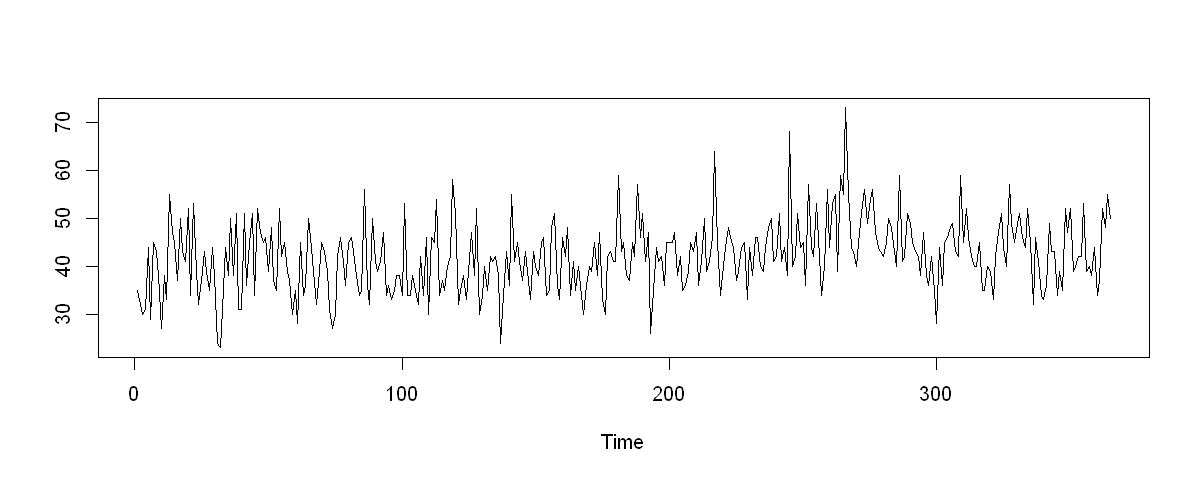

In [21]:
data <- read.csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv")
data %>% glimpse

plot.ts(data$Births, ylab = NA)  # graphical representation of the data

### Identification

In [19]:
adf.test(data$Births)

Warning message in adf.test(data$Births):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  data$Births
Dickey-Fuller = -5.1042, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


According to result of the test, I have enough evidence to consider the data as stationary. Now I will plot acf and pacf to help me with estimation of the model.

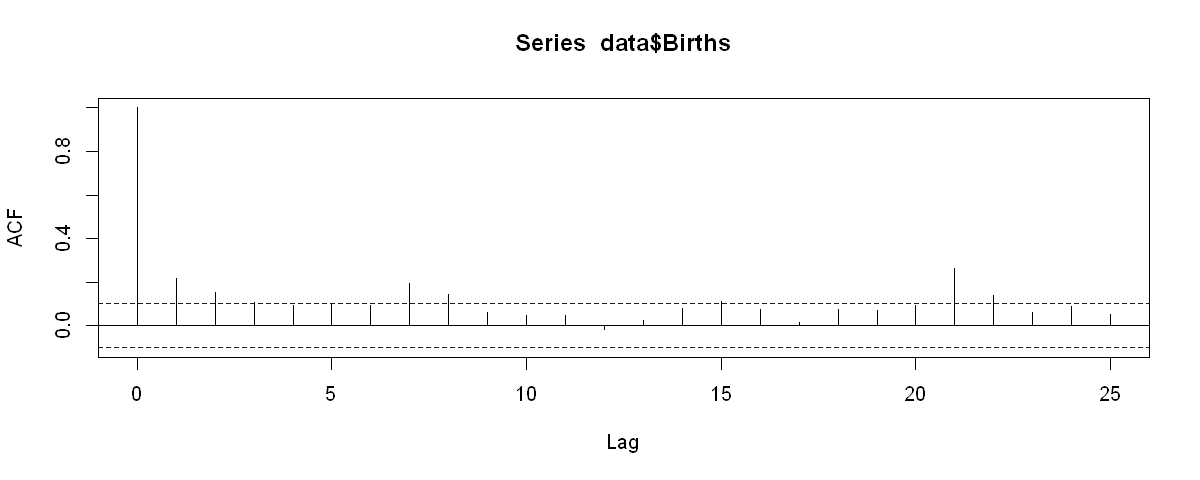

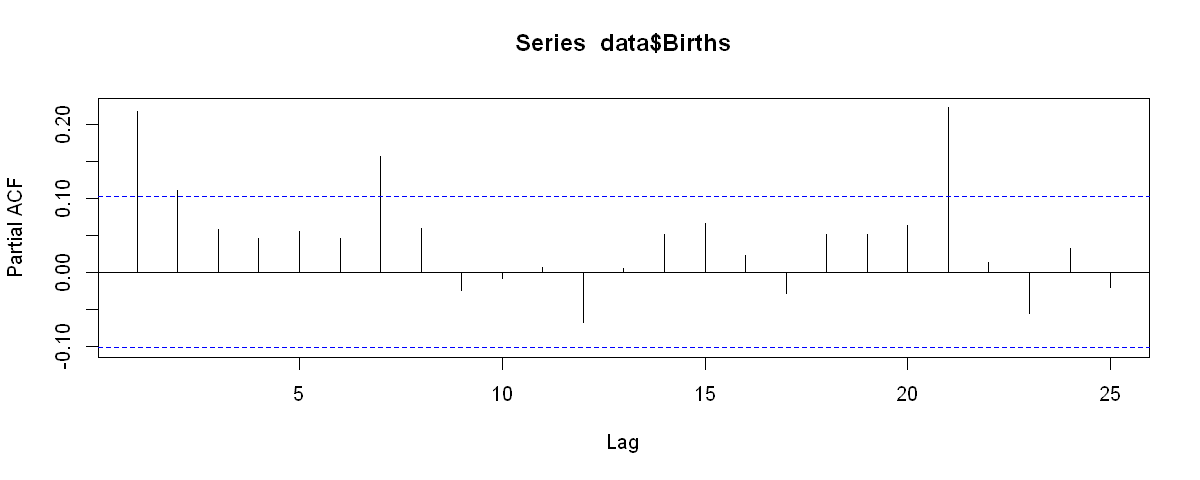

In [27]:
acf(data$Births)
pacf(data$Births)

In [40]:
model100 <- Arima(data$Births, order = c(1, 0, 0))
summary(model100)
model100$aic

model200 <- Arima(data$Births, order = c(2, 0, 0))
summary(model200)

model300 <- Arima(data$Births, order = c(3, 0, 0))
summary(model300)

model001 <- Arima(data$Births, order = c(0, 0, 1))
summary(model001)

model002 <- Arima(data$Births, order = c(0, 0, 2))
summary(model002)

Series: data$Births 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
         ar1     mean
      0.2179  41.9816
s.e.  0.0511   0.4789

sigma^2 estimated as 51.58:  log likelihood=-1236.54
AIC=2479.08   AICc=2479.15   BIC=2490.78

Training set error measures:
                      ME     RMSE      MAE       MPE    MAPE      MASE
Training set 0.004626871 7.161908 5.602757 -2.954357 13.8462 0.7704585
                    ACF1
Training set -0.02442495


[1] 2479.081

In [41]:
model_auto <- auto.arima(data$Births, approximation = FALSE, stepwise = FALSE)
summary(model_auto)

Series: data$Births 
ARIMA(1,1,1) 

Coefficients:
         ar1      ma1
      0.1252  -0.9625
s.e.  0.0548   0.0163

sigma^2 estimated as 49.42:  log likelihood=-1226.54
AIC=2459.07   AICc=2459.14   BIC=2470.77

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.4242962 7.000945 5.493345 -1.662857 13.33864 0.7554128
                    ACF1
Training set -0.01044628


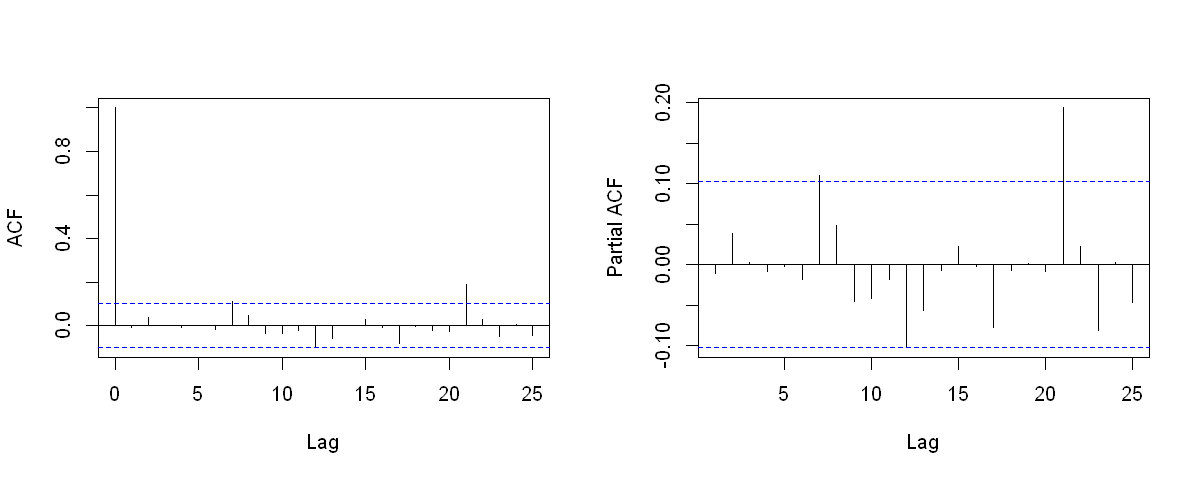

In [42]:
par(mfrow = c(1, 2))
acf(model_auto$residuals, main = NA)
pacf(model_auto$residuals, main = NA)

In [39]:
?Arima